In [7]:
import pandas as pd

from scipy import signal
import matplotlib.pyplot as plt

from constants import *

## Data Analysis

In [2]:
df = pd.read_csv("../data-processed/data-all.csv")

### Vizualize the data (Normalized)

The trends are vizualized by smoothing out the data


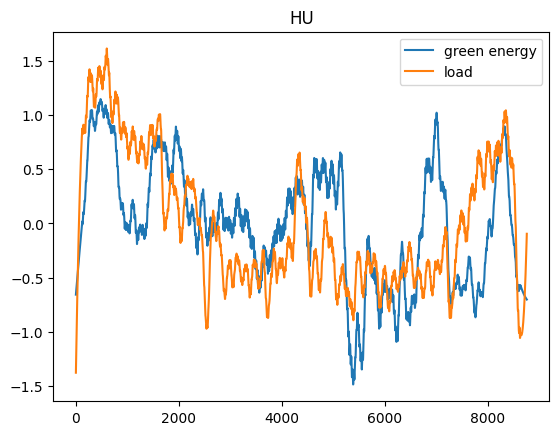

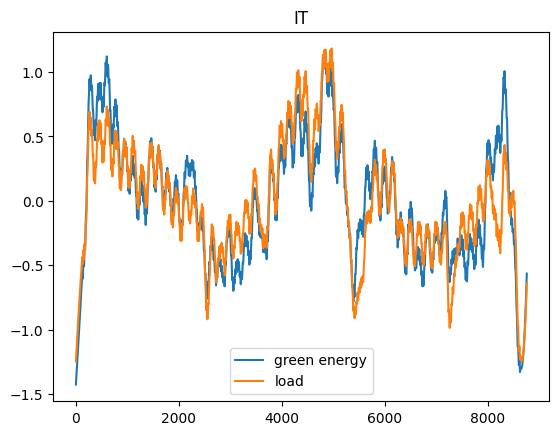

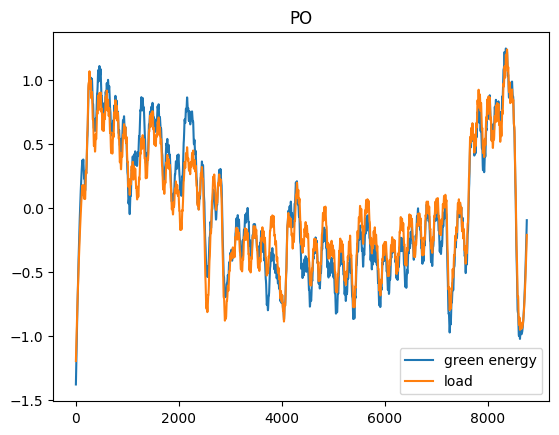

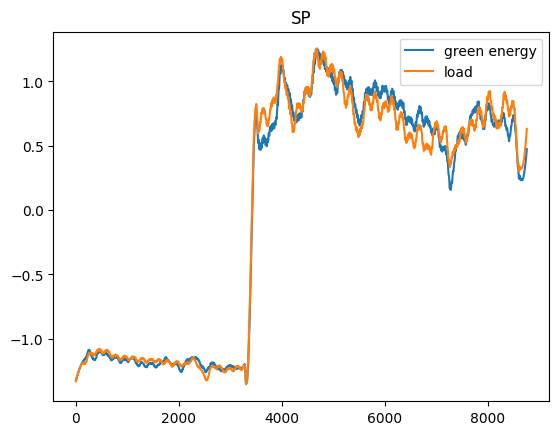

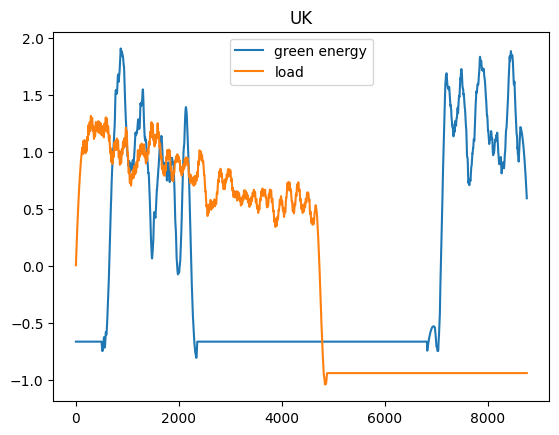

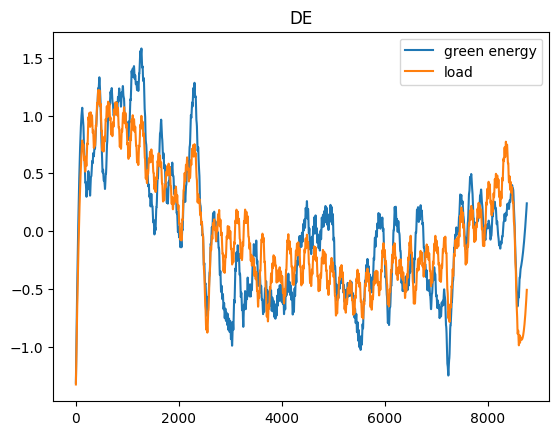

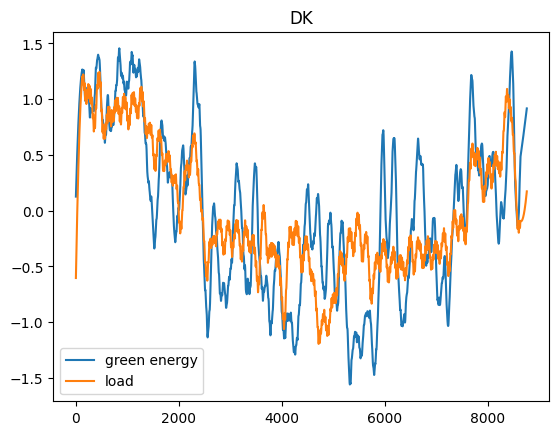

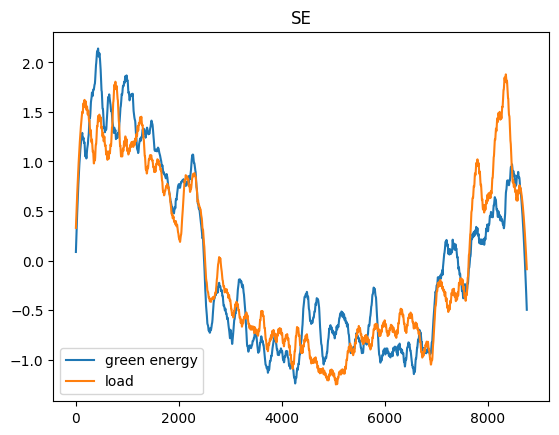

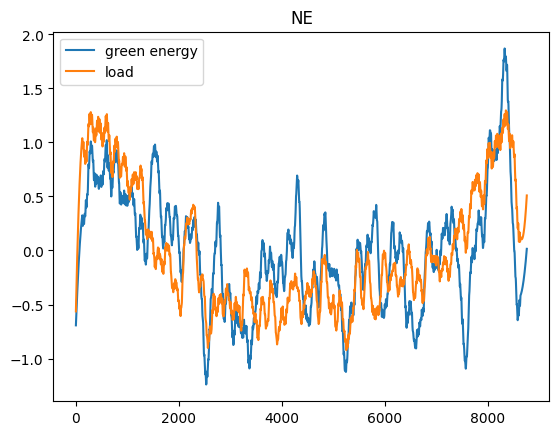

In [14]:
for region in REGIONS:
    col1 = f"green_energy_{region}"
    col2 = f"{region}_Load"

    ge = df[col1]
    load = df[col2]

    # use a high window to view the trend
    ge = signal.savgol_filter(ge, 250, 2)
    load = signal.savgol_filter(load, 250, 2)

    plt.Figure()
    plt.plot(df.index, ge)
    plt.plot(df.index, load)
    plt.legend(["green energy", "load"])
    plt.title(region)
    plt.show()

## Autocorrelation

Autocorrelation is the correlation of the signal with laged versions of itself. This will help us choose a suitable window for the LSTM model


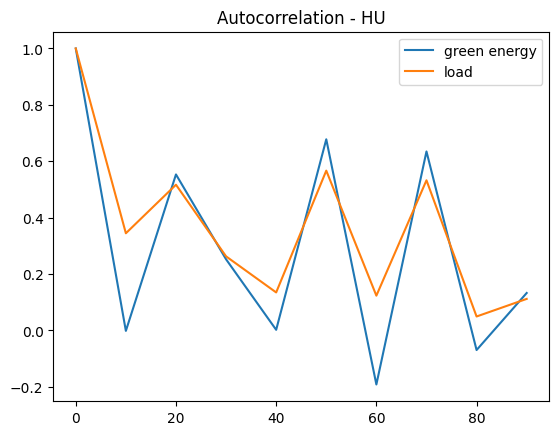

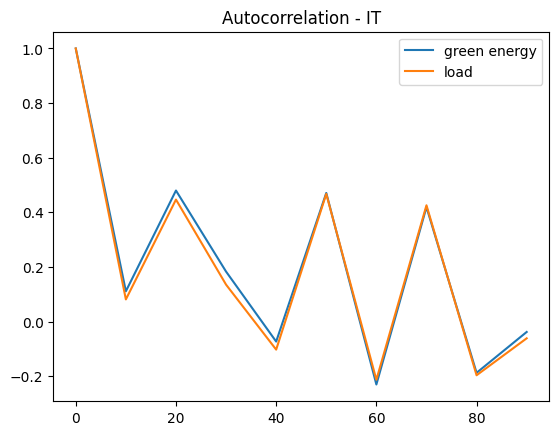

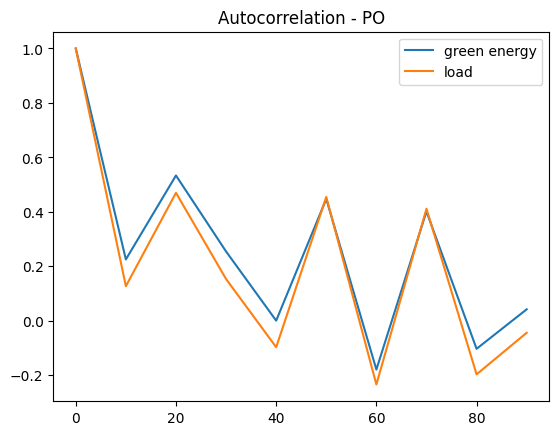

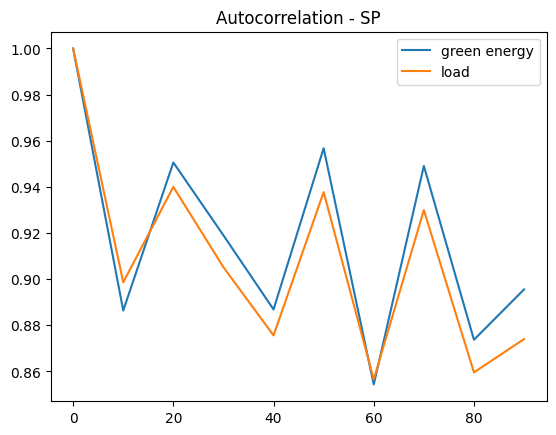

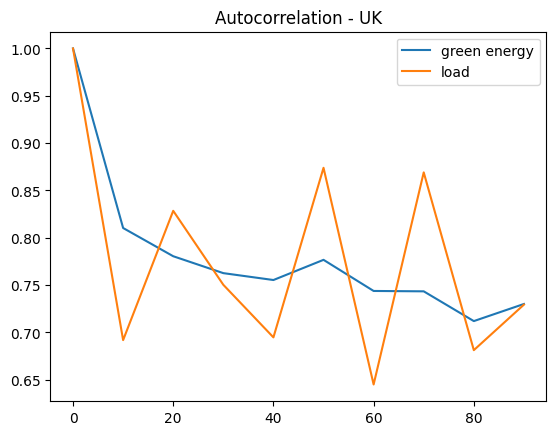

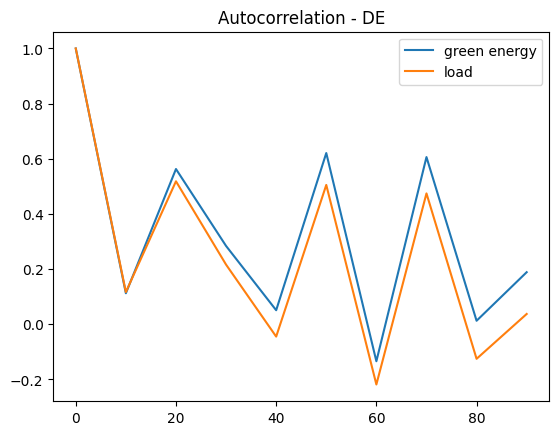

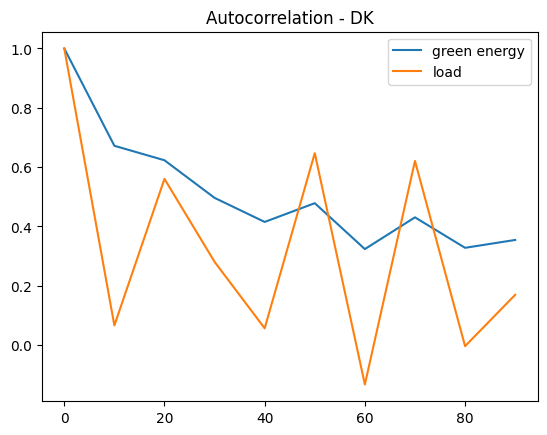

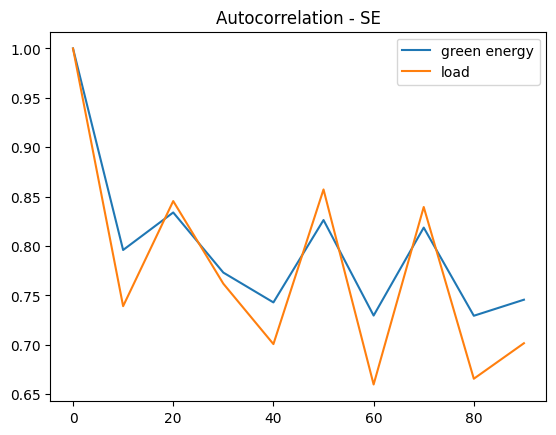

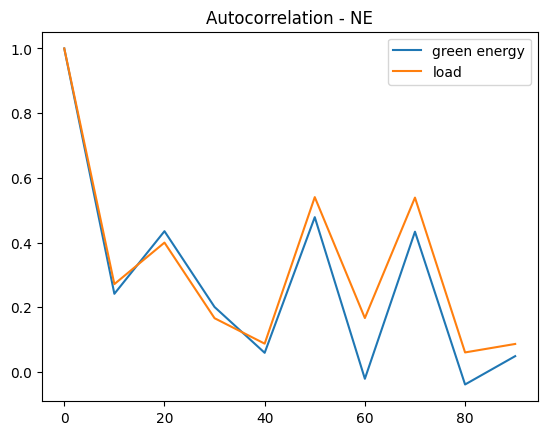

In [18]:
import numpy as np


lags = np.arange(0, 100, 10)


for region in REGIONS:
    col1 = f"green_energy_{region}"
    col2 = f"{region}_Load"

    ge = df[col1]
    load = df[col2]

    autocorrs_ge = []
    autocorrs_load = []
    for lag in lags:
        autocorrs_ge.append(ge.autocorr(lag))
        autocorrs_load.append(load.autocorr(lag))

    plt.Figure()
    plt.plot(lags, autocorrs_ge)
    plt.plot(lags, autocorrs_load)
    plt.legend(["green energy", "load"])
    plt.title(f"Autocorrelation - {region}")
    plt.show()